### Create a new notebook, knn_model, and work with the titanic dataset to answer the following:

In [72]:
import prepare
import acquire 
import env 
import warnings
warnings.filterwarnings("ignore")

# Tabular data friends:
import pandas as pd
import numpy as np

# Data viz:
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn stuff:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


# Data acquisition
from pydataset import data




### Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [74]:
df = acquire.new_titanic_data()

In [75]:
df.dropna(inplace=True)


In [76]:
train, validate, test = prepare.split_titanic_data(df)

Train:(101, 13)
Test:(37, 13)
Val: (44, 13)
Train Titanic Data:
     passenger_id  survived  pclass     sex    age  sibsp  parch      fare  \
429           429         1       3    male  32.00      0      0    8.0500   
679           679         1       1    male  36.00      0      1  512.3292   
118           118         0       1    male  24.00      0      1  247.5208   
435           435         1       1  female  14.00      1      2  120.0000   
782           782         0       1    male  29.00      0      0   30.0000   
209           209         1       1    male  40.00      0      0   31.0000   
137           137         0       1    male  37.00      1      0   53.1000   
337           337         1       1  female  41.00      0      0  134.5000   
577           577         1       1  female  39.00      1      0   55.9000   
641           641         1       1  female  24.00      0      0   69.3000   
809           809         1       1  female  33.00      1      0   53.1000   


In [77]:
train

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
429,429,1,3,male,32.00,0,0,8.0500,S,Third,E,Southampton,1
679,679,1,1,male,36.00,0,1,512.3292,C,First,B,Cherbourg,0
118,118,0,1,male,24.00,0,1,247.5208,C,First,B,Cherbourg,0
435,435,1,1,female,14.00,1,2,120.0000,S,First,B,Southampton,0
782,782,0,1,male,29.00,0,0,30.0000,S,First,D,Southampton,1
209,209,1,1,male,40.00,0,0,31.0000,C,First,A,Cherbourg,1
137,137,0,1,male,37.00,1,0,53.1000,S,First,C,Southampton,0
337,337,1,1,female,41.00,0,0,134.5000,C,First,E,Cherbourg,1
577,577,1,1,female,39.00,1,0,55.9000,S,First,E,Southampton,0
641,641,1,1,female,24.00,0,0,69.3000,C,First,B,Cherbourg,1


In [170]:
X_train.shape, X_validate.shape, X_test.shape

((101, 7), (44, 7), (37, 7))

In [37]:
train.fare.dtype

dtype('float64')

In [38]:
train.age.dtype

dtype('float64')

In [78]:
X_train = train.drop(columns=['passenger_id', 'sex',
    'embarked', 'class', 'deck', 'embark_town'])
y_train = train.survived

X_validate = validate.drop(columns=['passenger_id', 'sex',
    'embarked', 'class', 'deck', 'embark_town'])
y_validate = validate.survived

X_test = test.drop(columns=['passenger_id', 'sex',
    'embarked', 'class', 'deck', 'embark_town'])
y_test = test.survived

### Evaluate your results using the model score, confusion matrix, and classification report.

In [79]:
print(f"""train:
{train.columns.to_list()} 
_____________________________________________
X_train:
{X_train.columns.to_list()}
_____________________________________________
X_validate:
{X_validate.columns.to_list()}
""")

train:
['passenger_id', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'deck', 'embark_town', 'alone'] 
_____________________________________________
X_train:
['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'alone']
_____________________________________________
X_validate:
['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'alone']



In [173]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=1) 


X_train = train.drop(columns=['passenger_id', 'sex',
        'embarked','embark_town', 'class', 'deck'])
y_train = train.survived

#### Fit it

In [174]:
knn1.fit(X_train, y_train)  


KNeighborsClassifier(n_neighbors=1)

In [175]:
y_pred1 = knn1.predict(X_train)

In [176]:
y_pred1[:5]

array([1, 1, 0, 1, 0])

In [177]:
train_score = knn1.score(X_train, y_train)

In [178]:
train_score

1.0

In [84]:
y_pred_proba = knn1.predict_proba(X_train)

In [85]:
y_pred_proba[:5]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [86]:
confusion_matrix(y_train,y_pred1)

array([[33,  0],
       [ 0, 68]])

#### Classification Report

In [88]:
print(classification_report(y_train, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        68

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



#### Confusion Matrix

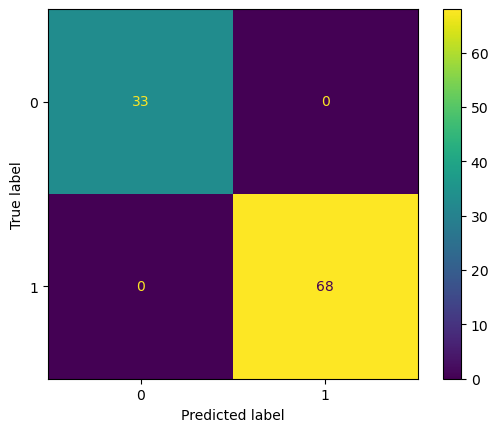

In [89]:
ConfusionMatrixDisplay.from_estimator(knn1, X_train, y_train)

### Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [146]:
k1 = classification_report(y_train, y_pred1)
print(classification_report(y_train, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        68

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



### Run through steps 1-3 setting k to 10

In [124]:
knn10 = KNeighborsClassifier(n_neighbors=10) 


X_train = train.drop(columns=['passenger_id', 'sex',
        'embarked','embark_town', 'class', 'deck'])
y_train = train.survived

In [125]:
knn10.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=10)

#### make prediction

In [126]:
y_pred10 = knn10.predict(X_train)

In [127]:
y_pred10[:5]

array([1, 1, 1, 1, 1])

#### estimate prbability

In [128]:
y_pred_proba = knn10.predict_proba(X_train)

In [129]:
y_pred_proba[:5]

array([[0.4, 0.6],
       [0.3, 0.7],
       [0.3, 0.7],
       [0. , 1. ],
       [0.3, 0.7]])

#### compute acc

In [130]:
confusion_matrix(y_train,y_pred10)

array([[11, 22],
       [ 5, 63]])

#### classification report

In [147]:
k10 = (classification_report(y_train, y_pred10))
print(classification_report(y_train, y_pred10))

              precision    recall  f1-score   support

           0       0.69      0.33      0.45        33
           1       0.74      0.93      0.82        68

    accuracy                           0.73       101
   macro avg       0.71      0.63      0.64       101
weighted avg       0.72      0.73      0.70       101



#### Confusion Matrix

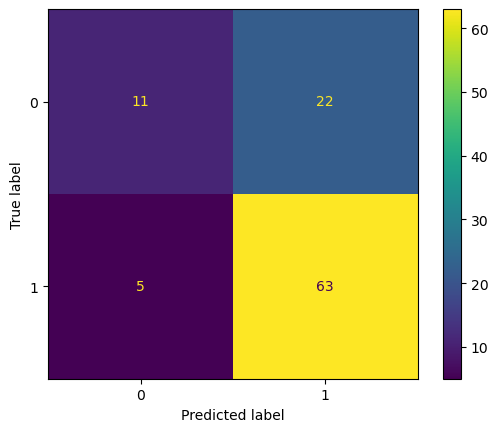

In [132]:
ConfusionMatrixDisplay.from_estimator(knn10, X_train, y_train)

### Set K to 20

In [133]:
knn20 = KNeighborsClassifier(n_neighbors=20) 


X_train = train.drop(columns=['passenger_id', 'sex',
        'embarked','embark_town', 'class', 'deck'])
y_train = train.survived

In [134]:
knn20.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=20)

#### make prediction

In [135]:
y_pred20 = knn20.predict(X_train)

In [136]:
y_pred20[:5]

array([1, 1, 1, 1, 1])

#### estimate probability

In [137]:
y_pred_proba = knn20.predict_proba(X_train)

In [138]:
y_pred_proba[:5]

array([[0.35, 0.65],
       [0.25, 0.75],
       [0.25, 0.75],
       [0.2 , 0.8 ],
       [0.3 , 0.7 ]])

#### compute acc

In [139]:
confusion_matrix(y_train,y_pred20)

array([[10, 23],
       [ 4, 64]])

#### classification report

In [144]:
k20 = (classification_report(y_train, y_pred20))
print(classification_report(y_train, y_pred20))

              precision    recall  f1-score   support

           0       0.71      0.30      0.43        33
           1       0.74      0.94      0.83        68

    accuracy                           0.73       101
   macro avg       0.72      0.62      0.63       101
weighted avg       0.73      0.73      0.70       101



#### confusion matrix

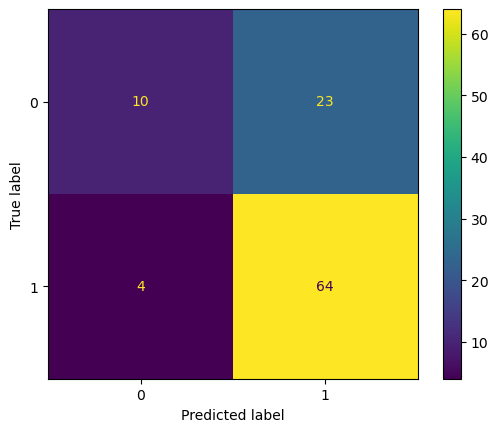

In [141]:
ConfusionMatrixDisplay.from_estimator(knn20, X_train, y_train)

### What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [148]:
print('k=1',k1 )
print('k=10',k10 )
print('k=20',k20 )


k=1               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        68

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101

k=10               precision    recall  f1-score   support

           0       0.69      0.33      0.45        33
           1       0.74      0.93      0.82        68

    accuracy                           0.73       101
   macro avg       0.71      0.63      0.64       101
weighted avg       0.72      0.73      0.70       101

k=20               precision    recall  f1-score   support

           0       0.71      0.30      0.43        33
           1       0.74      0.94      0.83        68

    accuracy                           0.73       101
   macro avg       0.72      0.62      0.63       101
weighted avg       0.73      0.73      0.70       101



k1 out performed k10 and k20 with higher f1 score, with k10 and k20 tieing at 73% f1 score

### Which model performs best on our out-of-sample data from validate?

In [154]:
model_set = []
model_accuracies = []

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    model_set.append(knn)
    model_accuracies.append({
        'neighbors': i,
        'train_score': round(knn.score(X_train, y_train), 2),
        'validate_score': round(knn.score(X_validate, y_validate), 2)
    })


In [155]:
model_set

[KNeighborsClassifier(n_neighbors=1),
 KNeighborsClassifier(n_neighbors=2),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=4),
 KNeighborsClassifier(),
 KNeighborsClassifier(n_neighbors=6),
 KNeighborsClassifier(n_neighbors=7),
 KNeighborsClassifier(n_neighbors=8),
 KNeighborsClassifier(n_neighbors=9),
 KNeighborsClassifier(n_neighbors=10),
 KNeighborsClassifier(n_neighbors=11),
 KNeighborsClassifier(n_neighbors=12),
 KNeighborsClassifier(n_neighbors=13),
 KNeighborsClassifier(n_neighbors=14),
 KNeighborsClassifier(n_neighbors=15),
 KNeighborsClassifier(n_neighbors=16),
 KNeighborsClassifier(n_neighbors=17),
 KNeighborsClassifier(n_neighbors=18),
 KNeighborsClassifier(n_neighbors=19),
 KNeighborsClassifier(n_neighbors=20)]

In [156]:
model_accuracies

[{'neighbors': 1, 'train_score': 1.0, 'validate_score': 0.57},
 {'neighbors': 2, 'train_score': 0.76, 'validate_score': 0.45},
 {'neighbors': 3, 'train_score': 0.79, 'validate_score': 0.66},
 {'neighbors': 4, 'train_score': 0.75, 'validate_score': 0.52},
 {'neighbors': 5, 'train_score': 0.74, 'validate_score': 0.66},
 {'neighbors': 6, 'train_score': 0.74, 'validate_score': 0.66},
 {'neighbors': 7, 'train_score': 0.7, 'validate_score': 0.66},
 {'neighbors': 8, 'train_score': 0.73, 'validate_score': 0.61},
 {'neighbors': 9, 'train_score': 0.71, 'validate_score': 0.66},
 {'neighbors': 10, 'train_score': 0.73, 'validate_score': 0.66},
 {'neighbors': 11, 'train_score': 0.72, 'validate_score': 0.7},
 {'neighbors': 12, 'train_score': 0.69, 'validate_score': 0.68},
 {'neighbors': 13, 'train_score': 0.69, 'validate_score': 0.68},
 {'neighbors': 14, 'train_score': 0.68, 'validate_score': 0.68},
 {'neighbors': 15, 'train_score': 0.71, 'validate_score': 0.7},
 {'neighbors': 16, 'train_score': 0.72

In [158]:
model_acc_df = pd.DataFrame(model_accuracies)

In [159]:
model_acc_df

,neighbors,train_score,validate_score
0,1,1.00,0.57
1,2,0.76,0.45
2,3,0.79,0.66
3,4,0.75,0.52
4,5,0.74,0.66
5,6,0.74,0.66
6,7,0.70,0.66
7,8,0.73,0.61
8,9,0.71,0.66
9,10,0.73,0.66


In [168]:
validate_g_to_l = model_acc_df.groupby('neighbors')['validate_score'].mean().sort_values(ascending = False)

In [169]:
pd.DataFrame(validate_g_to_l)

,validate_score
neighbors,
11,0.70
15,0.70
19,0.70
18,0.70
17,0.70
16,0.70
20,0.70
12,0.68
13,0.68
